# Cars Price Dataset

**About Dataset**
This dataset consist of data From 1985 Ward's Automotive Yearbook.

**Content**
This data set consists of three types of entities: 
- (a) the specification of an auto in terms of various characteristics, 
- (b) its assigned insurance risk rating, 
- (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
- The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/machine learning projects/Machine-Learning-Projects/Automobile Price Prediction/cars_price.csv')
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
24578,3.0,150,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,NaN,56.1,2658.0,ohc,four,121.0,NaN,NaN,3.07,NaN,110,5250,21.0,28.0,11850
7137,-1.0,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157.0,NaN,four,NaN,mpfi,3.62,3.15,7.5,162,NaN,17.0,22.0,18950
13753,2.0,NaN,NaN,gas,std,two,hatchback,NaN,front,93.7,157.3,64.4,50.8,1918.0,ohc,four,92.0,2bbl,NaN,3.23,9.4,NaN,5500,37.0,41.0,5389
1102,1.0,168,toyota,gas,std,NaN,sedan,rwd,front,94.5,168.7,64.0,52.6,2265.0,dohc,NaN,98.0,mpfi,3.24,3.08,9.4,112,6600,26.0,29.0,9298
27737,0.0,81,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,NaN,59.1,2290.0,ohc,four,92.0,2bbl,3.05,3.03,9.0,62,4800,27.0,NaN,7898


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

------

## Handle Data Anomilies

In [4]:
question_mark_counts = (df == '?').sum()
question_mark_counts = question_mark_counts[question_mark_counts > 0]

print("Columns containing '?'\n")
print(question_mark_counts)

Columns containing '?'

normalized-losses    5526
num-of-doors          260
bore                  531
stroke                532
horsepower            260
peak-rpm              250
price                 563
dtype: int64


**Our first anomilie is '?' in the dataset. We will replace it with NaN**


In [5]:
for i in df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']]:
    df[i].replace('?', np.nan, inplace = True)

**Lets check '?' removed ore not**

In [6]:
df[df['bore'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


**Firslt anomily solved**

**2nd we have wrong Dtypes of columns**
- Change ['bore', 'stroke', 'normalized-losses', 'horsepower', 'peak-rpm', 'price'] into number

In [7]:
for column in ['bore', 'stroke', 'normalized-losses', 'horsepower', 'peak-rpm', 'price']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
df.dtypes

symboling            float64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

**Data types issue resolved**

**Lets check more deeper in data**

In [9]:
print(f'Total no of numerical columns are: {len(df.select_dtypes(include='number').columns)}')
print('=====================================')
print(f'Total no of categorical columns are: {len(df.select_dtypes(include='object').columns)}')
print('=====================================')

for col in df.select_dtypes(include='number').columns:
    print(f'No of Unique values {col}: {df[col].nunique()}')
print('=====================================')

for col in df.select_dtypes(include='object').columns:
    print(f'\n{df[col].value_counts().head()}')
print('=====================================')

for col in df.select_dtypes(include='number').columns:
    print(f'\nUnique values of {col}: {df[col].unique()}')

Total no of numerical columns are: 16
Total no of categorical columns are: 10
No of Unique values symboling: 6
No of Unique values normalized-losses: 51
No of Unique values wheel-base: 53
No of Unique values length: 75
No of Unique values width: 44
No of Unique values height: 49
No of Unique values curb-weight: 171
No of Unique values engine-size: 44
No of Unique values bore: 38
No of Unique values stroke: 36
No of Unique values compression-ratio: 32
No of Unique values horsepower: 59
No of Unique values peak-rpm: 23
No of Unique values city-mpg: 29
No of Unique values highway-mpg: 30
No of Unique values price: 186

make
toyota        4229
nissan        2338
mazda         2277
mitsubishi    1796
honda         1644
Name: count, dtype: int64

fuel-type
gas       24671
diesel     2638
Name: count, dtype: int64

aspiration
std      22383
turbo     4972
Name: count, dtype: int64

num-of-doors
four    15292
two     11769
Name: count, dtype: int64

body-style
sedan          12776
hatchback   

**All anomilies resolved**

----------

## Handle Missing Values

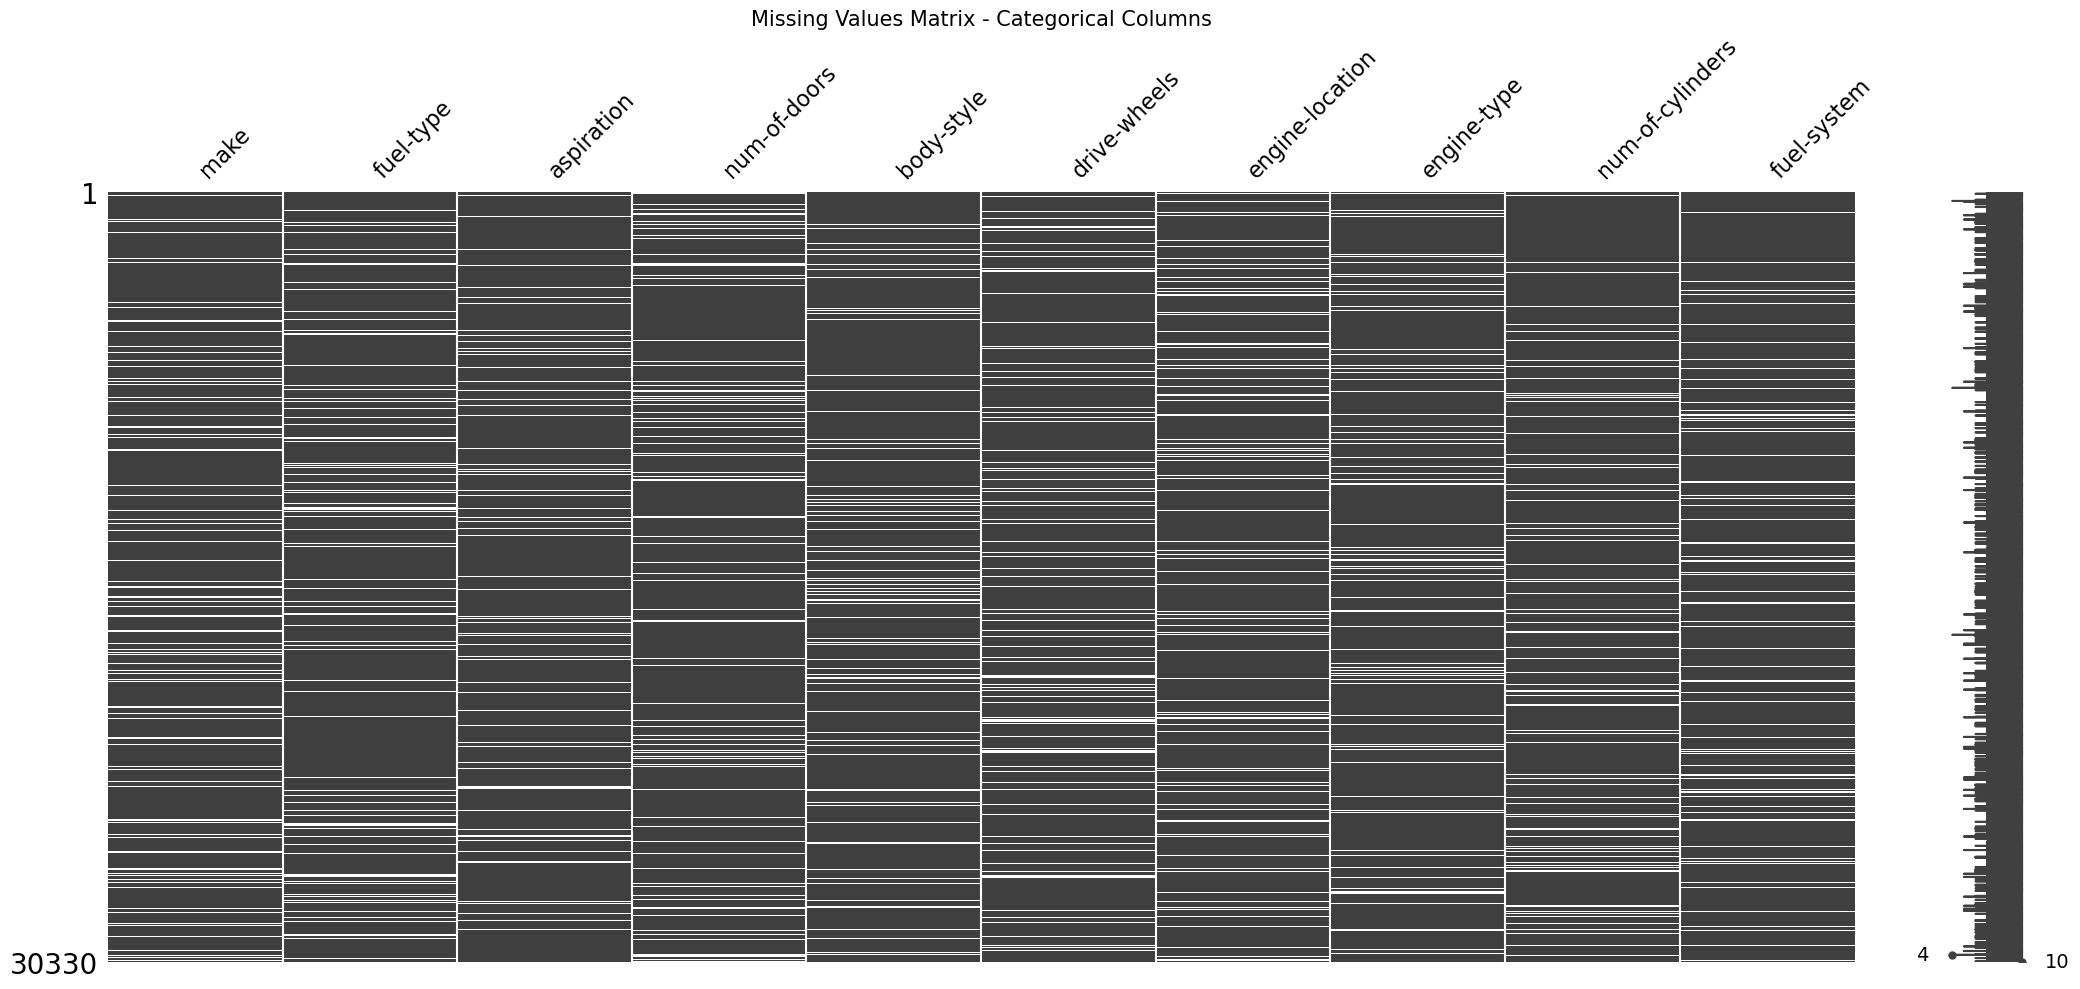

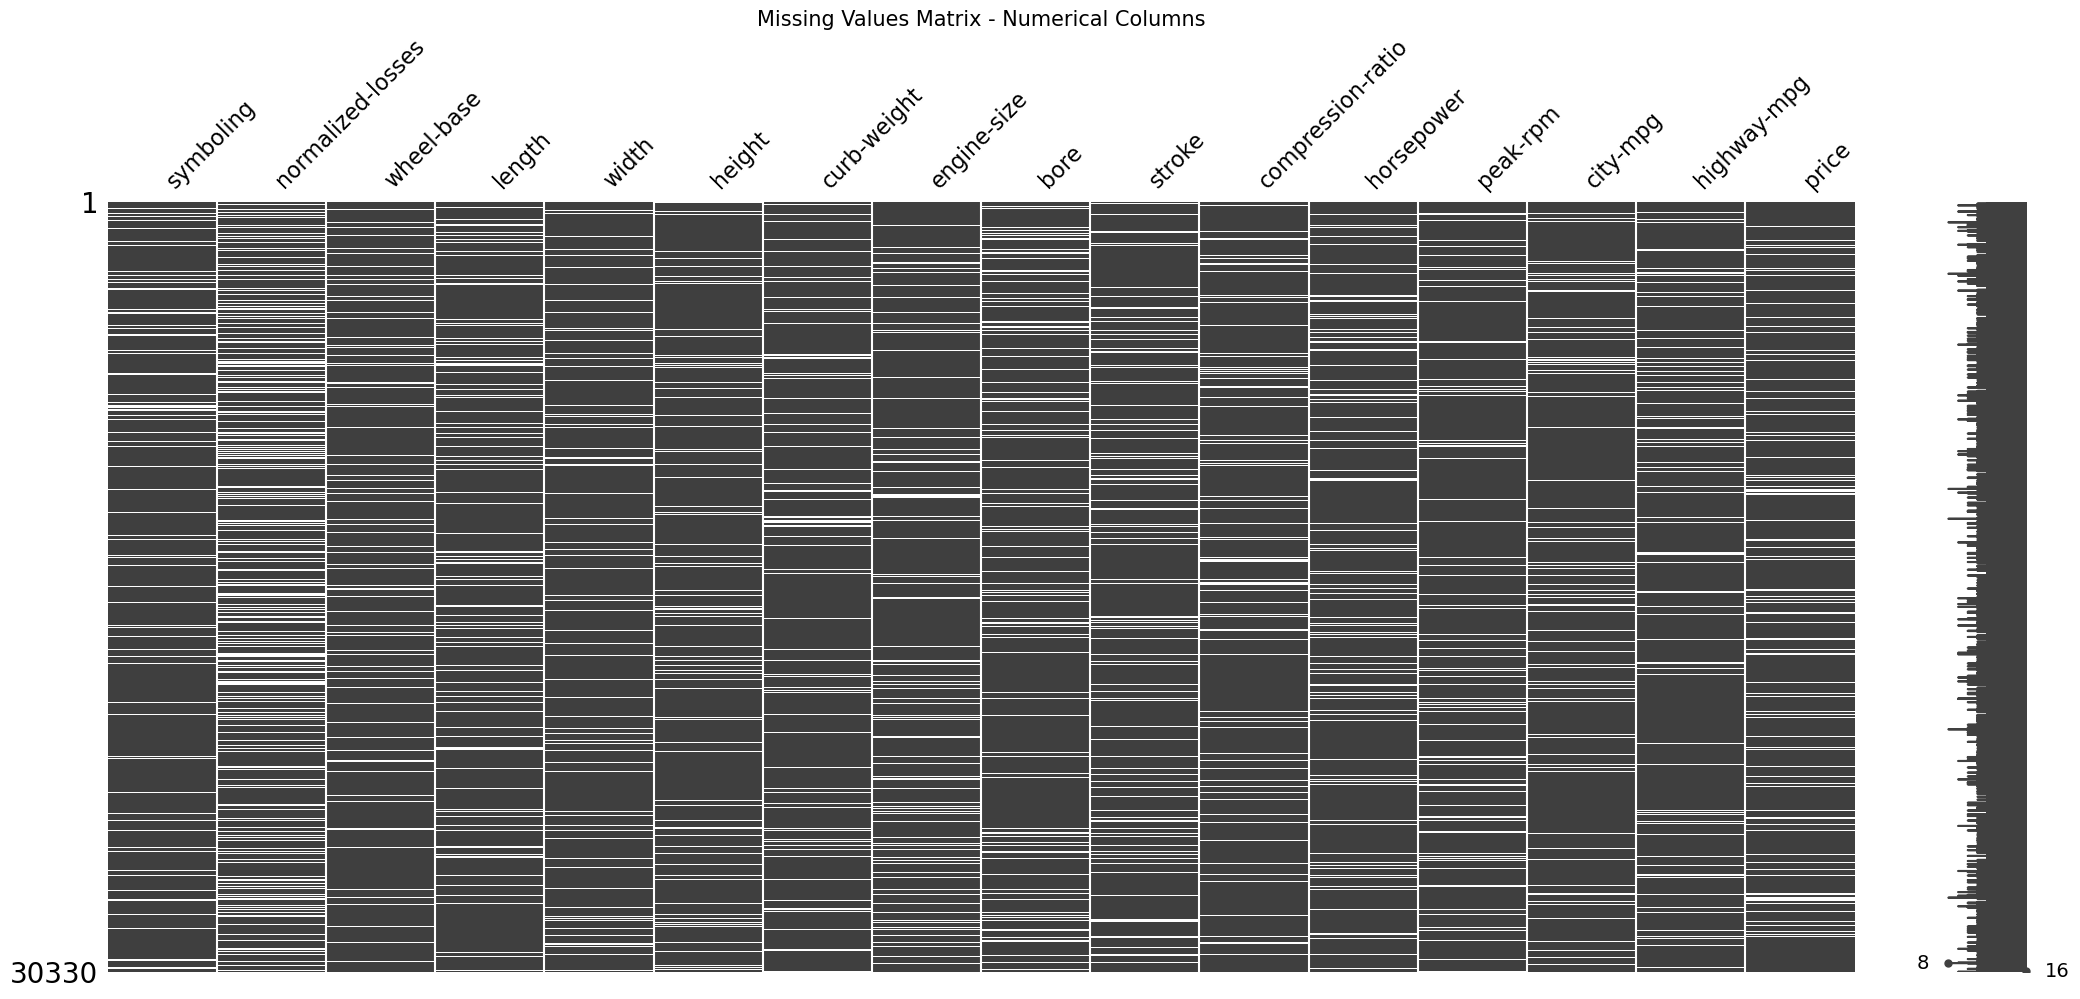

In [10]:
msn.matrix(df.select_dtypes(include=['object']))
plt.title('Missing Values Matrix - Categorical Columns', fontsize=15)
plt.show()

msn.matrix(df.select_dtypes(include=['number']))
plt.title('Missing Values Matrix - Numerical Columns', fontsize=15)
plt.show()

**Every columns missing values is MCAR, thats a good to go**

In [11]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index().rename(columns={'index':'feature', 0:'null_percentage'})

,feature,null_percentage
0,normalized-losses,28.229476
1,price,11.889219
2,bore,11.500165
3,stroke,11.384768
4,horsepower,11.236400
5,num-of-doors,10.778107
6,peak-rpm,10.712166
7,drive-wheels,10.270359
8,make,10.227498
9,city-mpg,10.224200


- The 'price' column is our target variable, and we should not impute missing values for it. Filling these missing values could introduce bias into the model, leading to inaccurate predictions and affecting the integrity of the model's results
- Split num columns and cat columns then fill with their appropriate method
- Lastly we check the missing values > `20%` how to deal them so no random noise occurs 

In [12]:
df = df.dropna(subset=['price'])

**First we deal with the numerical features**

In [13]:
numerical_features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

**Lets make a Distribution Plot to look the columns behave**

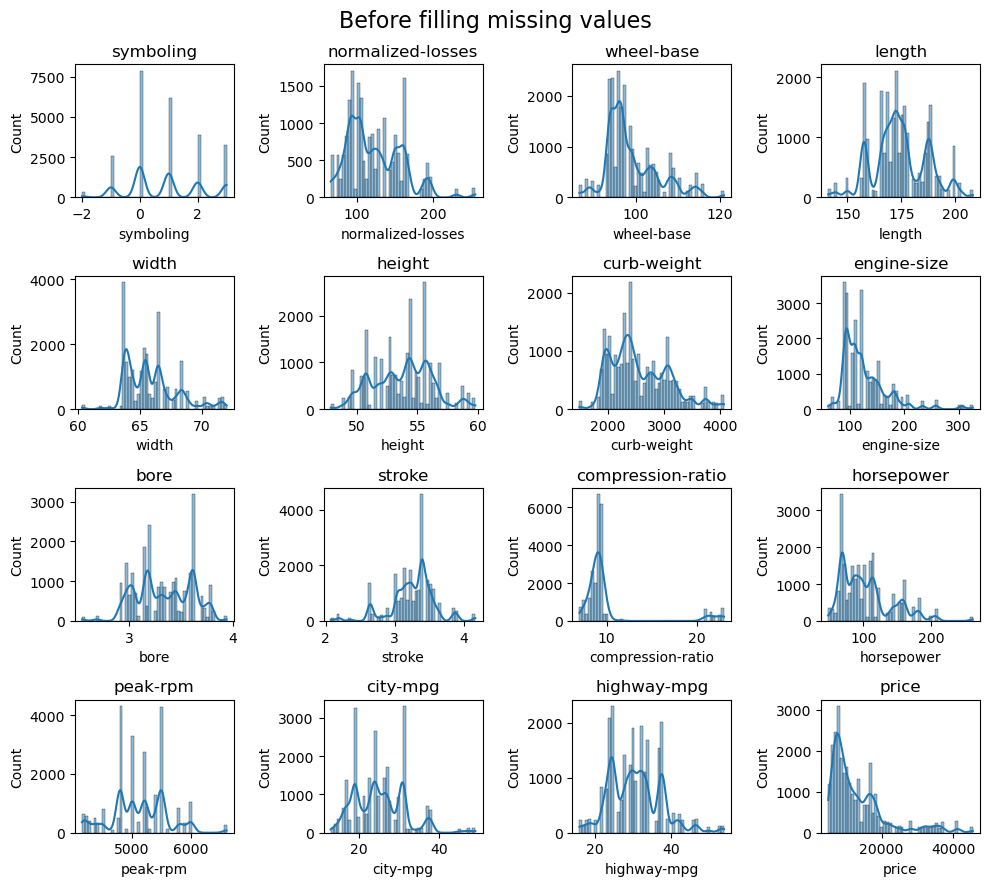

In [14]:
plt.figure(figsize=(10, 9))

for i, col in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)  
    sns.histplot(df[col], bins=50, kde=True, )
    plt.title(f'{col}')

plt.suptitle('Before filling missing values', fontsize=16)

plt.tight_layout()
plt.show()

In [15]:
without_normalzie = ['symboling', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

df[without_normalzie] = df[without_normalzie].fillna(df[without_normalzie].median())
df[without_normalzie].isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

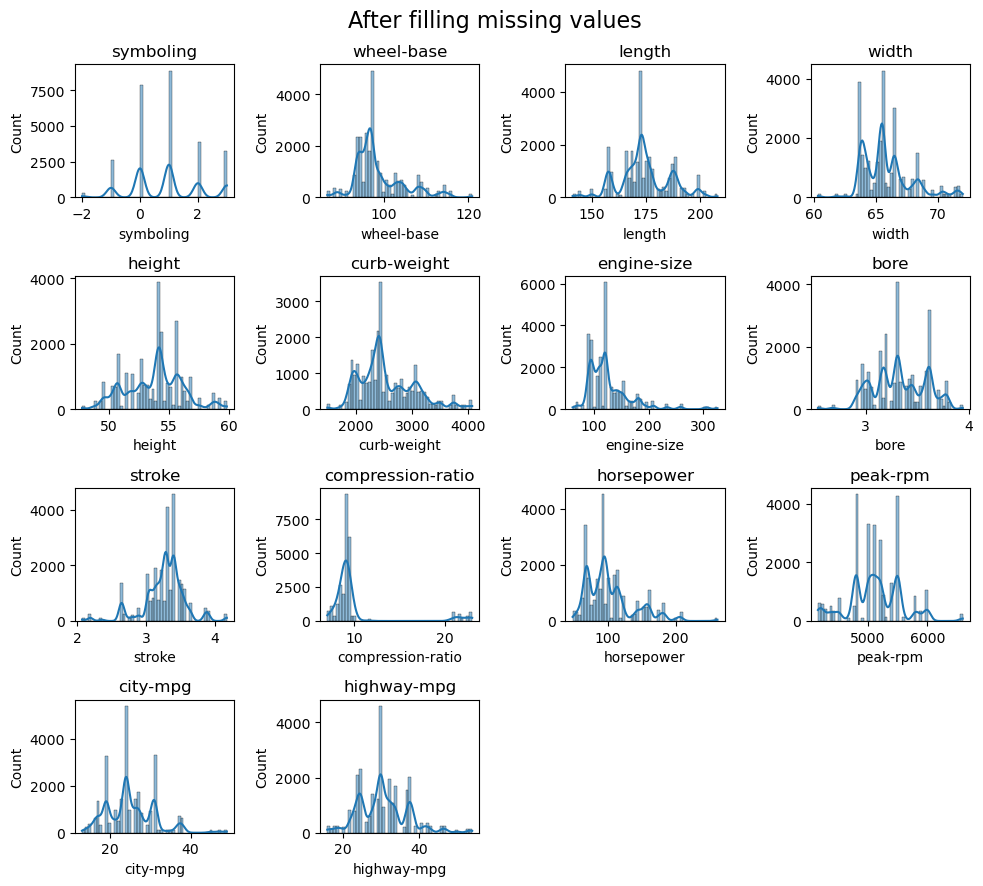

In [16]:
plt.figure(figsize=(10, 9))

for i, col in enumerate(df[without_normalzie]):
    plt.subplot(4, 4, i+1)  
    sns.histplot(df[col], bins=50, kde=True, )
    plt.title(f'{col}')

plt.suptitle('After filling missing values', fontsize=16)

plt.tight_layout()
plt.show()

**Random Sampling**

In [17]:
missing_mask = df['normalized-losses'].isnull()

imputed_values = df.loc[~missing_mask, 'normalized-losses'].sample(
    n=missing_mask.sum(), replace=True, random_state=42)

df.loc[missing_mask, 'normalized-losses'] = imputed_values.values

<Axes: ylabel='Density'>

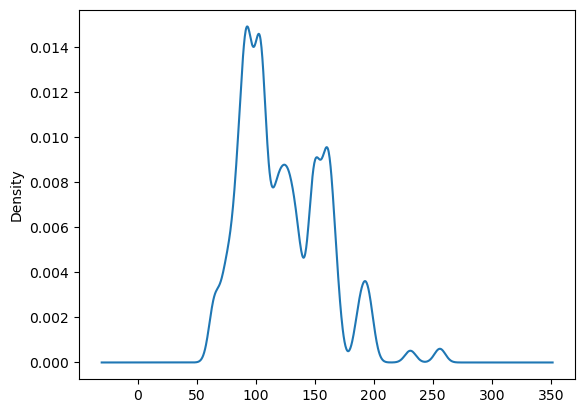

In [18]:
df['normalized-losses'].plot(kind='kde')

**SO the distribution remains same as after filling missing values**

**Handle categorical features**


In [19]:
categorical_features= ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system']

In [20]:
cat_columns_missing_values = (df[categorical_features].isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index()
cat_columns_missing_values.columns = ['Cat Features', 'Missing Percentage %']
cat_columns_missing_values

,Cat Features,Missing Percentage %
0,num-of-doors,10.780572
1,drive-wheels,10.223021
2,make,10.189343
3,fuel-system,10.163149
4,engine-type,10.155665
5,num-of-cylinders,10.028439
6,fuel-type,9.991019
7,engine-location,9.897470
8,body-style,9.848825
9,aspiration,9.747792


In [21]:
df['make'].replace('peugot', 'peugeot', inplace=True)

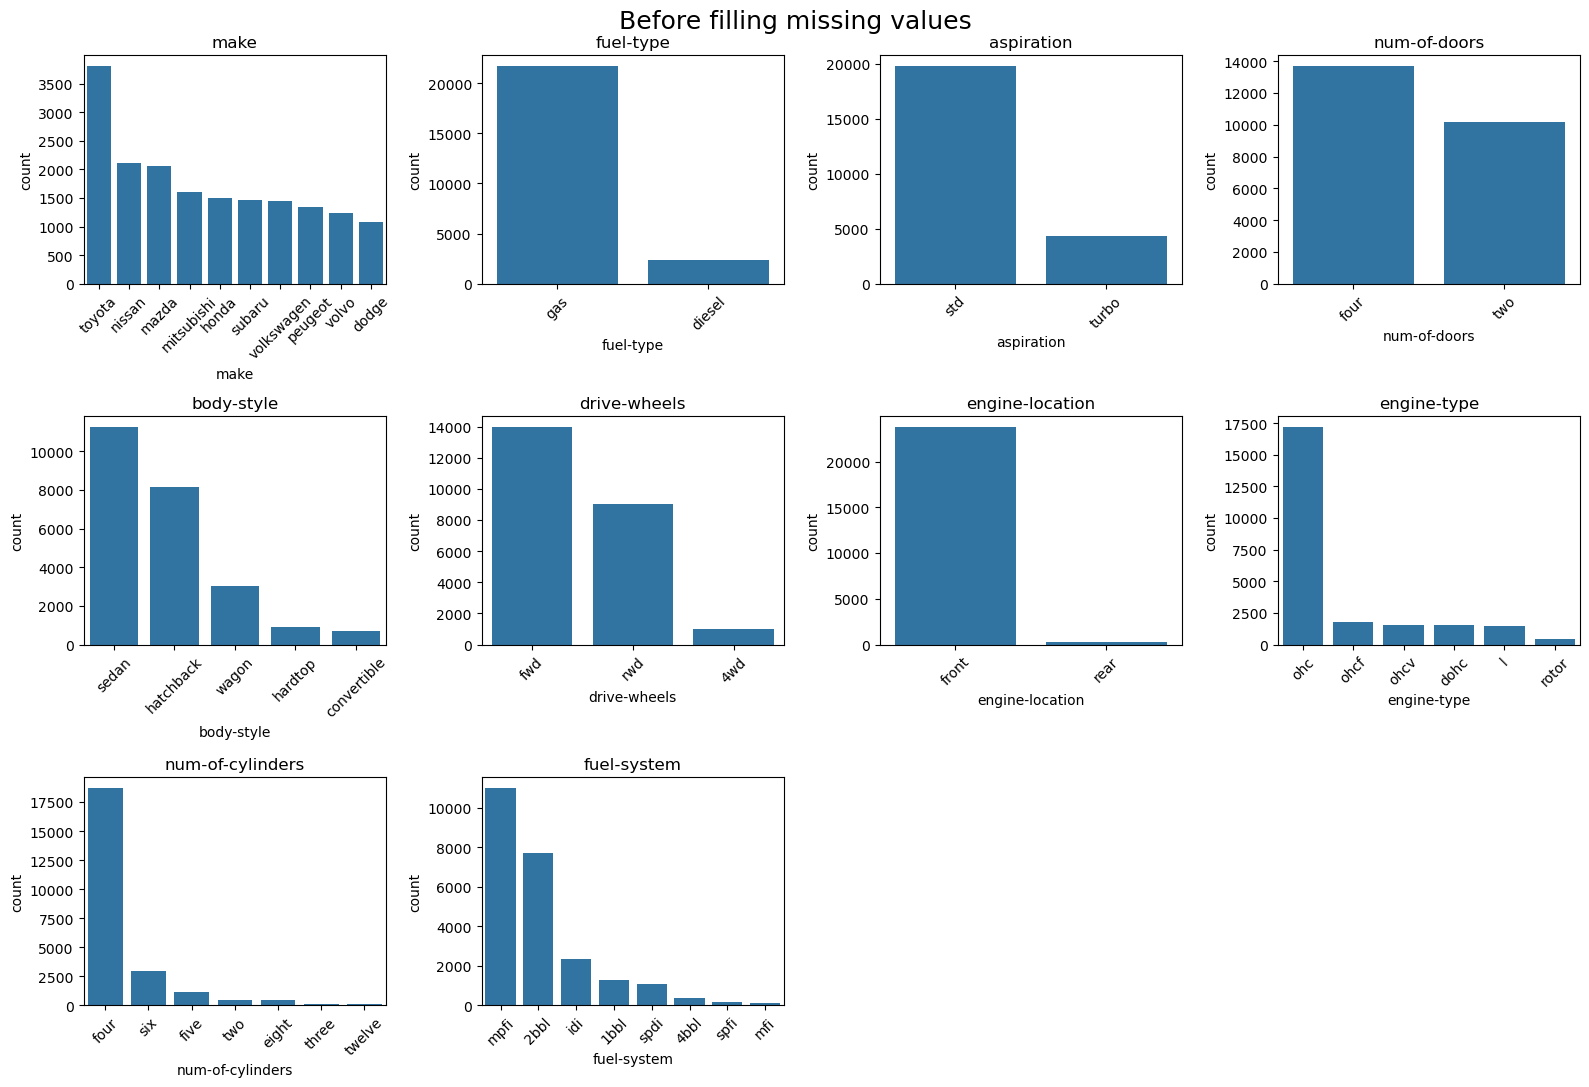

In [22]:
plt.figure(figsize=(16, 14))

for i, col in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)  
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    

plt.suptitle('Before filling missing values', fontsize=18)
plt.tight_layout()  
plt.show()

In [23]:
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

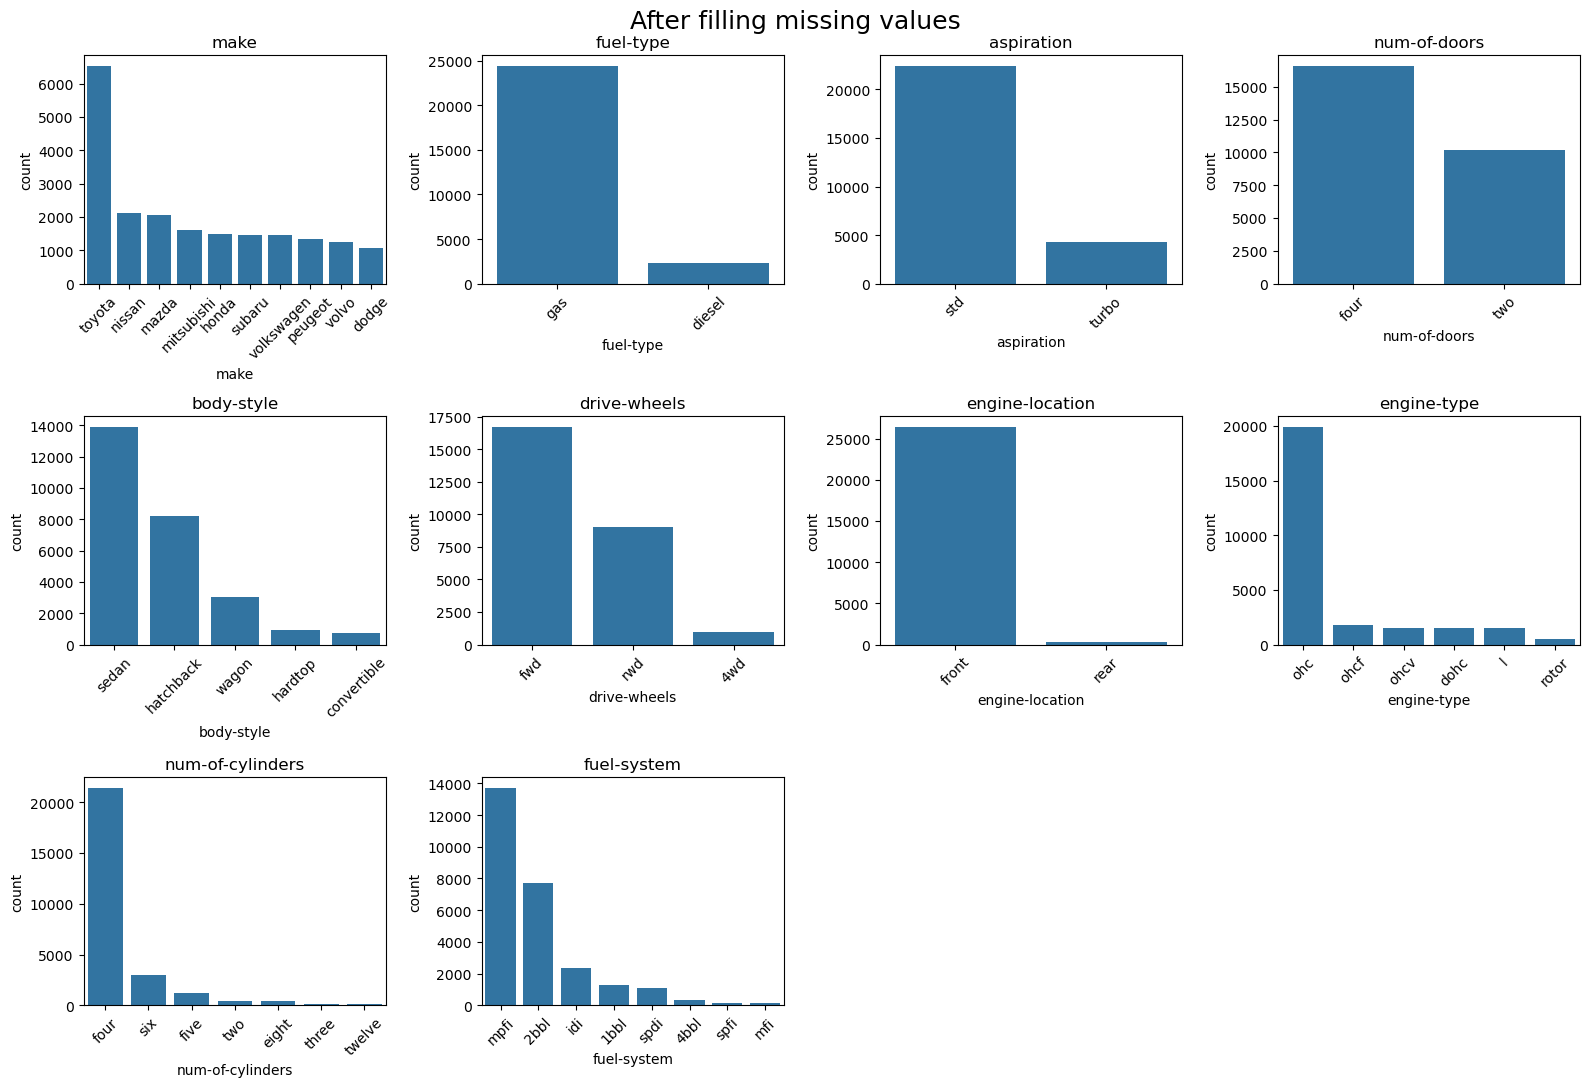

In [24]:
plt.figure(figsize=(16, 14))

for i, col in enumerate(df[categorical_features]):
    plt.subplot(4, 4, i+1)  
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index)
    plt.title(f'{col}')
    plt.xticks(rotation=45)

plt.suptitle('After filling missing values', fontsize=18)
plt.tight_layout()  
plt.show()

**DONE**

------------

## Deal With Outliers

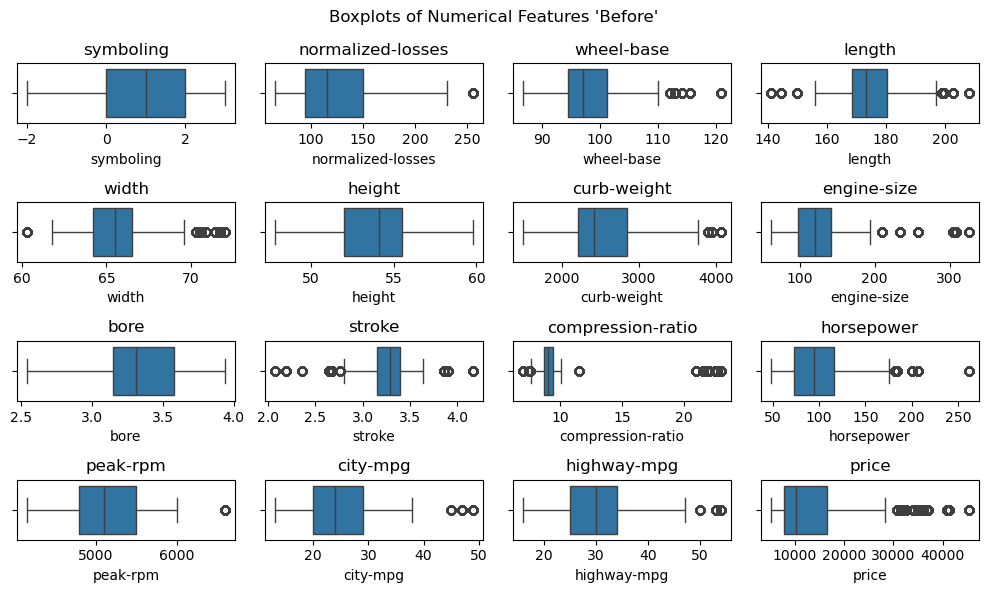

In [25]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_features):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.suptitle("Boxplots of Numerical Features 'Before'")
plt.tight_layout()
plt.show()

In [26]:
outliers = {}

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    
    outlier_values = df[(df[col] > upper_limit) | (df[col] < lower_limit)][col]
    
    outliers[col] = outlier_values.tolist()

    print(f"\nColumn: {col}")
    print(f"Upper Limit: {upper_limit}, Lower Limit: {lower_limit}")


Column: symboling
Upper Limit: 5.0, Lower Limit: -3.0

Column: normalized-losses
Upper Limit: 234.0, Lower Limit: 10.0

Column: wheel-base
Upper Limit: 111.25, Lower Limit: 84.44999999999999

Column: length
Upper Limit: 197.70000000000005, Lower Limit: 151.29999999999995

Column: width
Upper Limit: 69.94999999999999, Lower Limit: 60.75000000000001

Column: height
Upper Limit: 60.75, Lower Limit: 46.75

Column: curb-weight
Upper Limit: 3799.5, Lower Limit: 1259.5

Column: engine-size
Upper Limit: 205.5, Lower Limit: 33.5

Column: bore
Upper Limit: 4.2250000000000005, Lower Limit: 2.505

Column: stroke
Upper Limit: 3.775, Lower Limit: 2.775

Column: compression-ratio
Upper Limit: 10.450000000000003, Lower Limit: 7.649999999999998

Column: horsepower
Upper Limit: 180.5, Lower Limit: 8.5

Column: peak-rpm
Upper Limit: 6550.0, Lower Limit: 3750.0

Column: city-mpg
Upper Limit: 42.5, Lower Limit: 6.5

Column: highway-mpg
Upper Limit: 47.5, Lower Limit: 11.5

Column: price
Upper Limit: 29587

-------

- `normalized-losses` is a numeric feature representing the relative average loss payment per insured vehicle (i.e., risk rating) for a particular car make and model, compared to other vehicles.
    - Low (e.g., 65)	Lower risk of loss → lower insurance cost
    - High (e.g., 250)	Higher risk of loss → higher insurance cost
- `Wheelbase` is the distance between the centers of the front and rear wheels of a vehicle.
    - Compact Car (e.g., Honda Fit): shorter wheelbase (~2300 mm)
    - Sedan (e.g., Toyota Camry): medium wheelbase (~2800 mm)
    - SUV/Truck (e.g., Ford F-150): long wheelbase (~3200+ mm)
- `Length` is the total distance from the front bumper to the rear bumper of the vehicle.
    - Compact cars	~155 – 170
    - Midsize cars	~170 – 185
    - Full-size/SUVs	~185 – 208+
- `Width` is the distance across the car from side to side, measured at its widest point, usually including mirrors unless stated otherwise.
- `Curb weight` is the total weight of a vehicle with all standard equipment, fluids (oil, coolant, etc.), and a full tank of fuel — but without any passengers or cargo.
    - 1,500 – 2,000 lbs	Subcompact (e.g., small hatchbacks)
    - 2,000 – 3,000 lbs	Sedans, compact SUVs
    - 3,000 – 4,500 lbs	Full-size sedans, SUVs, trucks
    - 4,500 lbs	Heavy-duty SUVs, luxury vehicles, pickups
- `engine size` the total volume of all the cylinders in the engine, and it’s typically measured in liters (L) or cubic centimeters (cc)
    - 61 cc is much too small for typical car engines — it’s in the realm of motorcycles or go-karts.
    - 326 cc is still quite small for a car, as most car engines range from 1.0L (1000 cc) to 5.0L and higher.
- `stroke` refers to the distance the piston travels inside the engine cylinder from the top dead center (TDC) to the bottom dead center (BDC)
    - range (2.07 to 4.17 inches) is within a realistic range for many vehicles.
- `compression` ratio in cars is a key engine parameter that measures how much the air-fuel mixture is compressed inside the engine cylinder before ignition.
    - 7 might be used in older petrol engines or boosted engines where lower compression avoids knock.
    - 23 typical of diesel engines which require high compression for ignition.
- `horsepower` it tells you how much work an engine can do over time.
    - 40 – 80	Very low, micro or city cars
    - 80 – 120	Economy cars, basic sedans
    - 120 – 180	Mid-range, family cars
    - 180 – 250	Sporty or performance cars
    - 250+	High-performance/sports cars
- `peak-rpm`  it measures how many times the engine’s crankshaft spins in one minute.
    - 4,150 (min)	Likely the peak torque RPM of a diesel engine or a low-revving petrol engine — common in utility or economy cars.
    - 6,600 (max)	Likely the peak horsepower RPM of a high-revving petrol engine — could be a sporty or performance-oriented car.
- `city-mpg` is the number of miles that a car can travel on a gallon of gasoline in the city.
    - Very low fuel efficiency, likely a large SUV, truck, or sports car with a big engine.
    - Very high fuel efficiency, likely a hybrid, compact car, or small diesel engine. Could also be an electric car equivalent, depending on dataset.
- `highway-mpg` is the number of miles that a car can travel on a gallon of gasoline on the highway.
    - Very low fuel efficiency, likely a large SUV, truck, or sports car with a big engine.
    - Very high fuel efficiency, likely a hybrid, compact car, or small diesel engine. Could also be an electric car equivalent.
- `price` is the price of the car in thousands of dollars.
    - That is not outliers we have some luxary cars like (mercedez, audi, bmw, etc) that price are more than 300K / 400k.

-------

## Exploratory Data Analysis

### Univariate Analysis

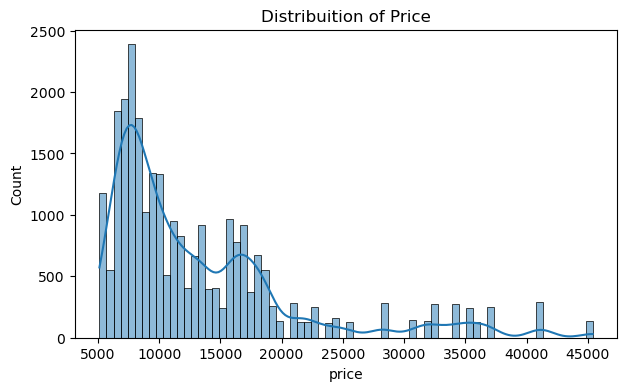

In [27]:
plt.figure(figsize=(7,4))
sns.histplot(x= df['price'], kde=True)
plt.title('Distribuition of Price')
plt.show()

**Price distribution is right skewed**

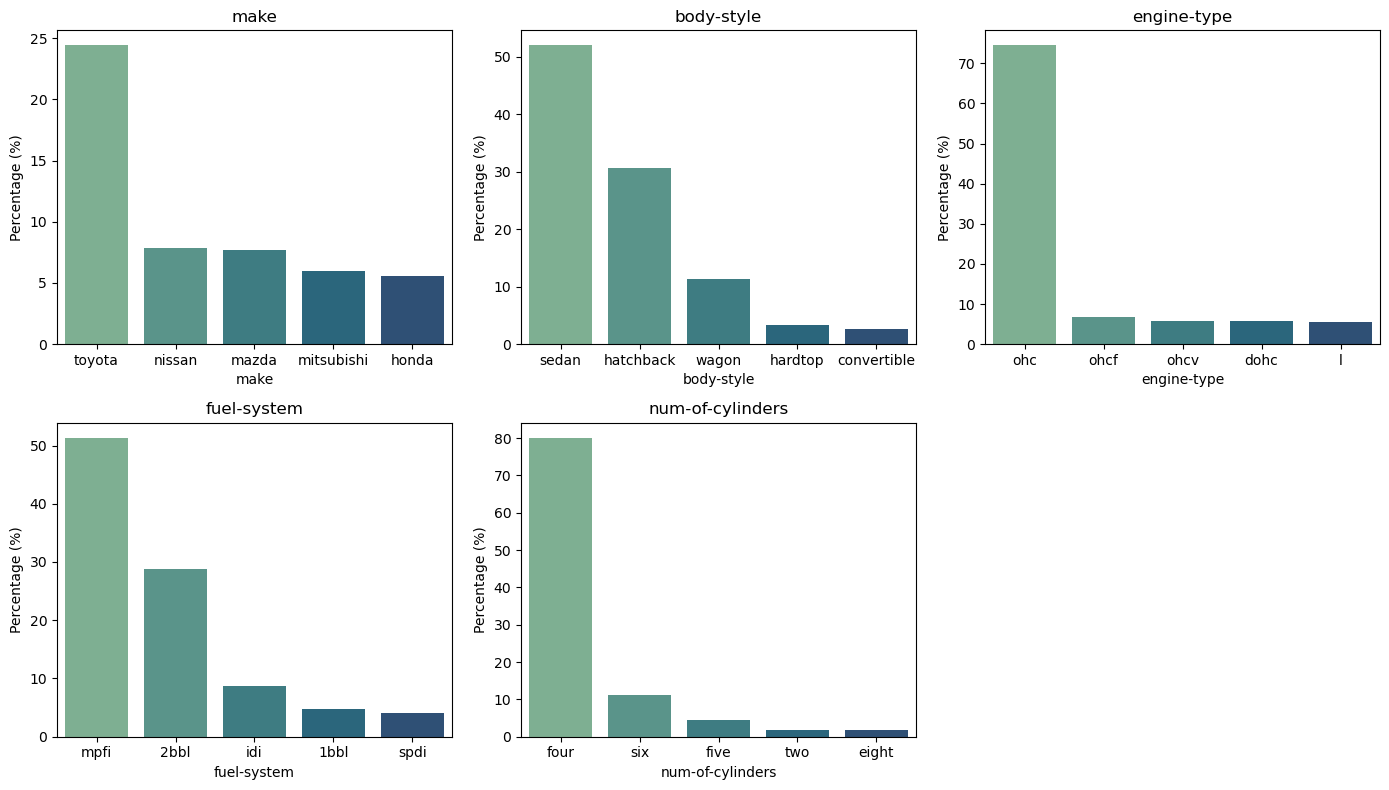

In [28]:
a = ['make', 'body-style', 'engine-type', 'fuel-system', 'num-of-cylinders']

plt.figure(figsize=(14, 8))
for i, col in enumerate(a):
    plt.subplot(2, 3, i+1)
    
    category_percentage = df[col].value_counts(normalize=True).mul(100).nlargest(5)
    sns.barplot(x=category_percentage.index, y=category_percentage.values, palette='crest')
    plt.title(f'{col}')
    plt.ylabel('Percentage (%)')
    
plt.tight_layout()
plt.show()

- `Toyota` emerges as the most popular car brand, comprising approximately `24%` of all entries in the dataset.
- This dominance suggest `Toyota's` strong presence in the market or a higher availability of Toyota cars in the dataset.
- The `sedan` is the most common car type, making up around `50%` of the dataset.
- `Sedans` are traditionally favored for their balance of `comfort, space, and fuel efficiency`, making this finding consistent with market trends.
- An impressive `70%` of the cars in the dataset feature an `OHC (Overhead Camshaft) engine`.
- `OHC` engines are known for their `reliability and efficiency`, which may explain their prevalence in the dataset.
- The `MPFI (Multi-Point Fuel Injection)` system is used in `50%` of the vehicles in the dataset.
- `MPFI` is known for `improving fuel efficiency` and reducing emissions, which may explain its popularity in more recent vehicle models.
- The most common engine configuration in the dataset is the `4-cylinder engine`, which accounts for a dominant `78%` of the entries.
- This high percentage suggests that `4-cylinder engines are widely preferred in the dataset`, likely due to their balance of performance, fuel efficiency, and cost-effectiveness, which makes them popular in economy and compact cars.

---------

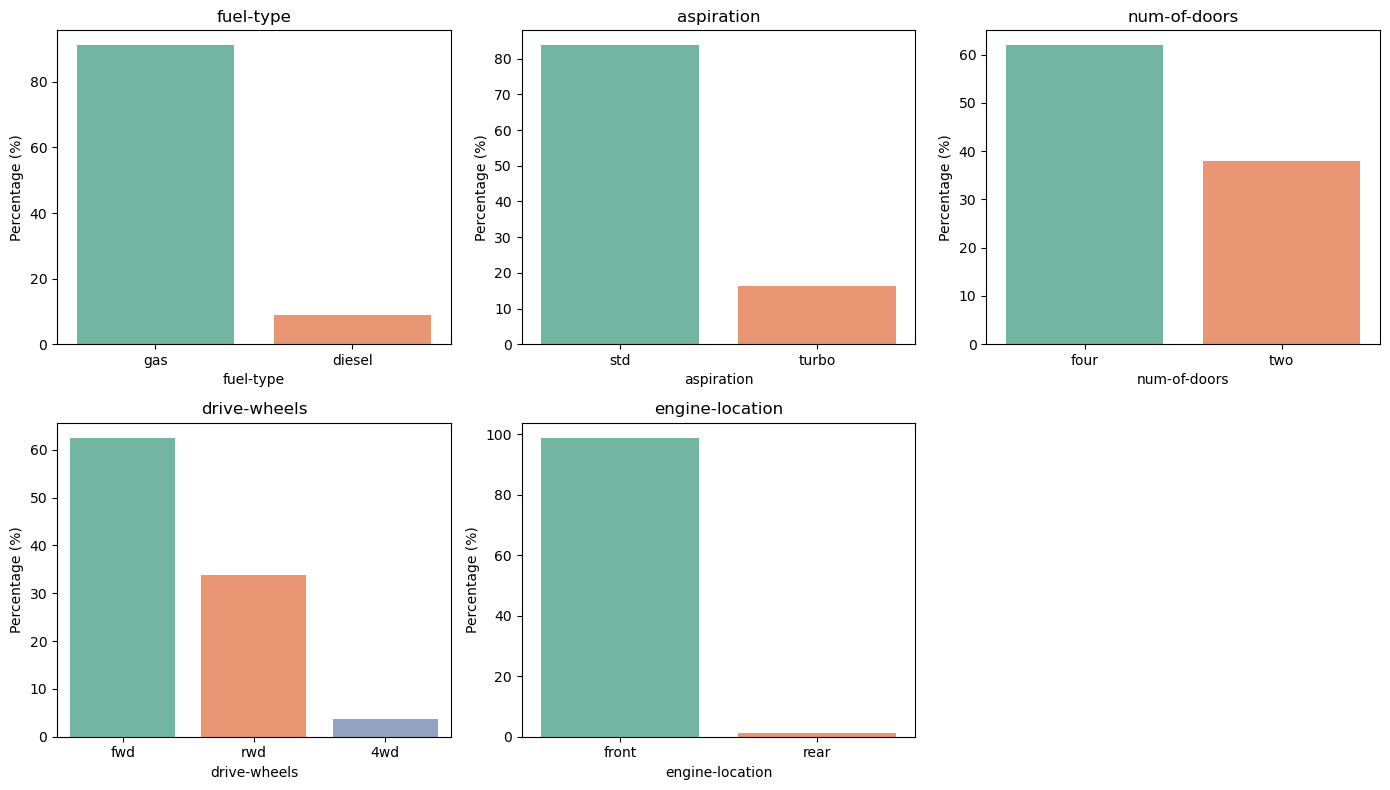

In [29]:
b = ['fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels', 'engine-location']

plt.figure(figsize=(14, 8))
for i, col in enumerate(b):
    plt.subplot(2, 3, i+1)
    
    category_percentage = df[col].value_counts(normalize=True).mul(100).nlargest(5)
    sns.barplot(x=category_percentage.index, y=category_percentage.values, palette='Set2')
    plt.title(f'{col}')
    plt.ylabel('Percentage (%)')
    
plt.tight_layout()
plt.show()

- `90%` of the cars in the dataset use `gasoline` as their fuel type.
- This highlights the dominance of gas-powered vehicles in the dataset, aligning with general market trends where `gasoline is the most common fuel type`.
- A substantial `80%` of the vehicles in the dataset are equipped with standard aspiration `(non-turbocharged engines)`.
- This indicates that `turbocharged engines are relatively rare` in this dataset compared to more conventional, naturally aspirated engines.
- The majority of cars, `60%, feature four doors`.
- `Four-door vehicles` are popular due to their practicality, especially in sedans and family cars.
- `60% of the cars in the dataset have `front-wheel drive (FWD)`.
- `Front-wheel drive` is common in compact and mid-size sedans due to its lower cost and better fuel efficiency in most driving conditions.
- An overwhelming `95%` of the vehicles in the dataset have their engine located at the front.

----------

### Bivariate Analysis

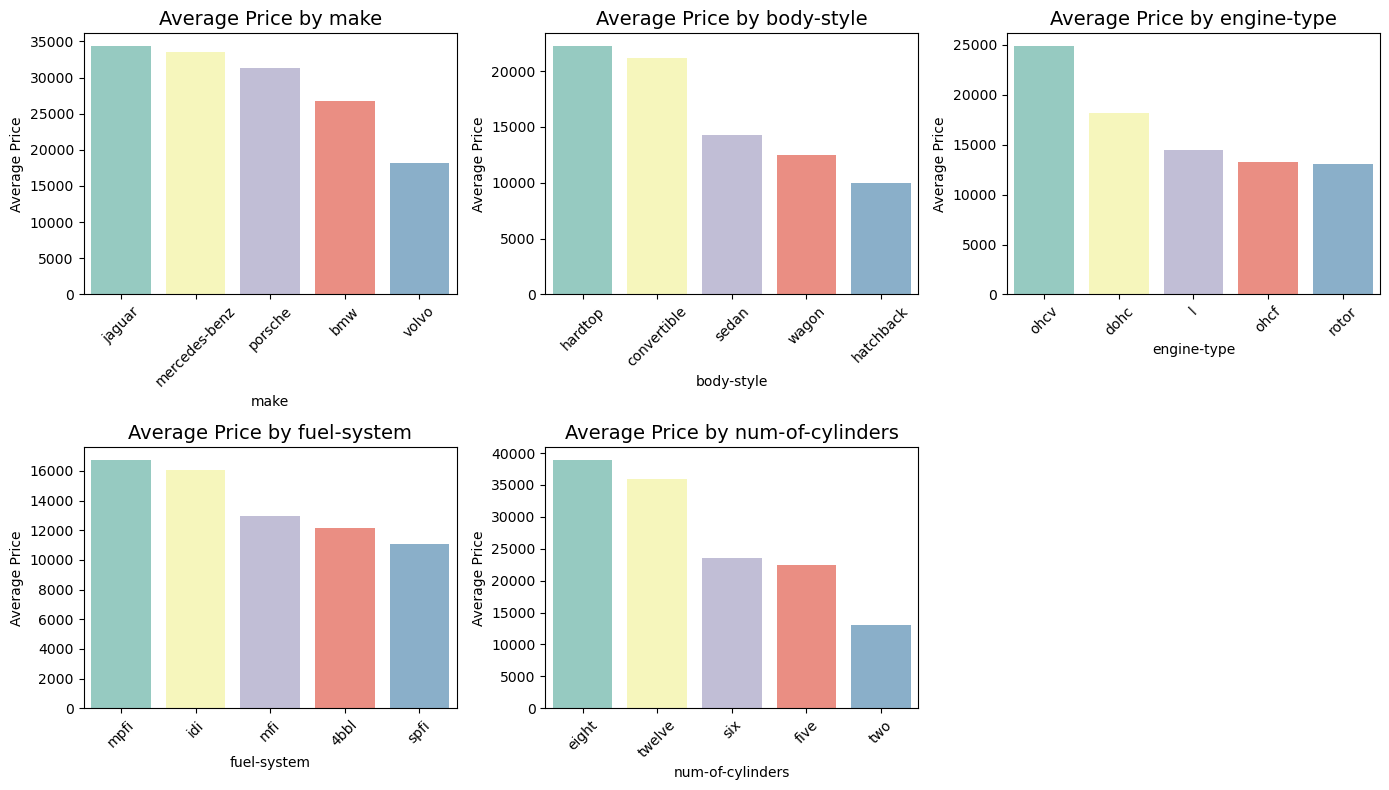

In [30]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(a):
    plt.subplot(2, 3, i+1)
    
    price_analysis = df.groupby(col)['price'].mean().reset_index().sort_values(by='price', ascending=False).head(5)
    sns.barplot(x=price_analysis[col], y=price_analysis['price'], palette='Set3')
    plt.title(f'Average Price by {col}', fontsize=14)
    plt.ylabel('Average Price')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- `Jaguar, Mercedes-Benz, Porsche, and BMW` are the `most expensive` car brands in the dataset, with an average price significantly higher than others.
- `Hardtop and Convertible body` styles are the most expensive, typically associated with more luxurious or performance-oriented vehicles.
- `OHCV engine type` is the most expensive, likely indicating a `higher-performance engine` configuration.
- `MPFI (Multi-Point Fuel Injection) and IDI (Indirect Injection) fuel systems` are associated with the highest prices in the dataset, suggesting these systems are typically found in higher-end vehicles.
- Cars with `8 and 12 cylinders` tend to have the highest average prices, reflecting their association with powerful, high-performance vehicles.

-------

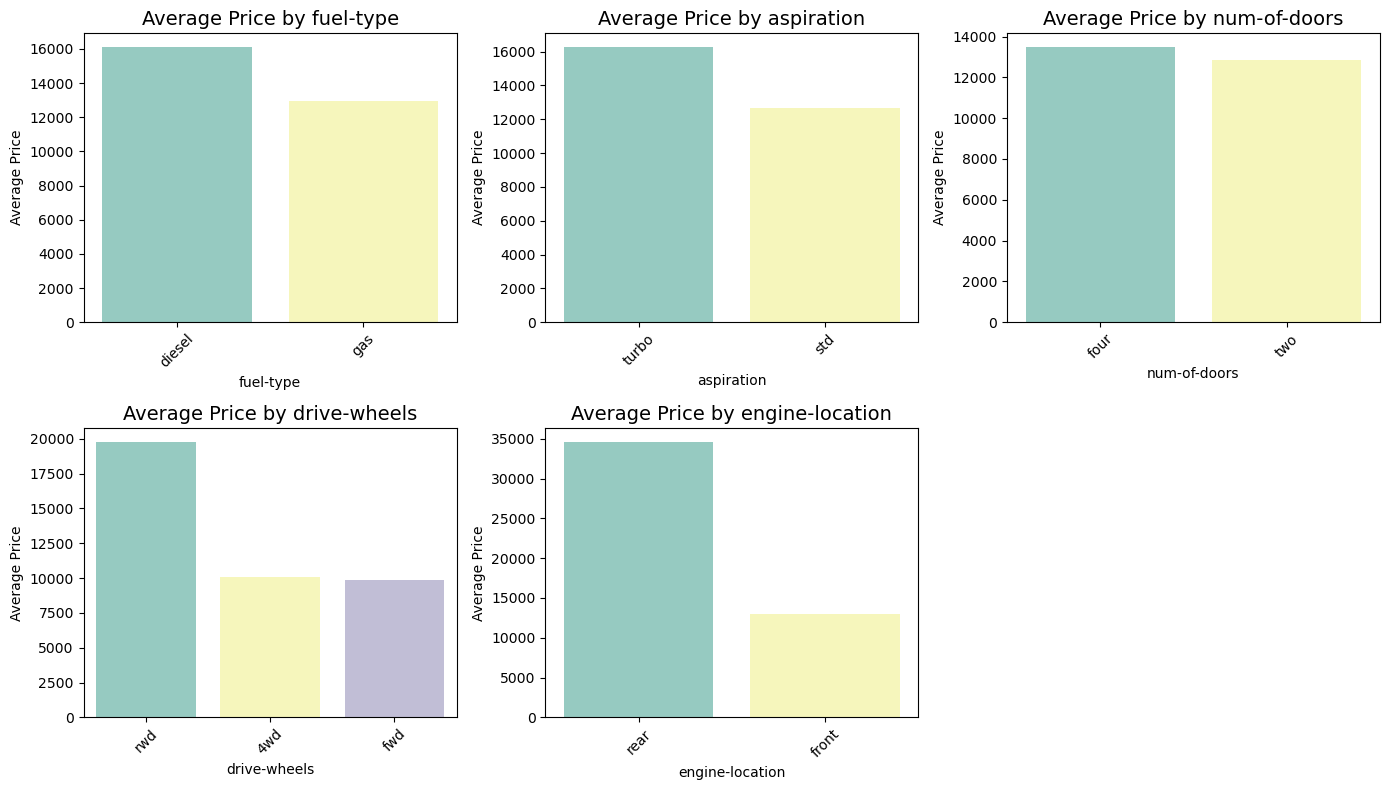

In [31]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(b):
    plt.subplot(2, 3, i+1)
    
    price_analysis = df.groupby(col)['price'].mean().reset_index().sort_values(by='price', ascending=False).head(5)
    sns.barplot(x=price_analysis[col], y=price_analysis['price'], palette='Set3')
    plt.title(f'Average Price by {col}', fontsize=14)
    plt.ylabel('Average Price')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- `Diesel cars` tend to have a `higher average price` than petrol cars, likely due to their more complex engine configurations and higher efficiency for long-distance driving.
- `Cars with turbocharged engines` are more expensive than those with standard (naturally aspirated) engines, as turbocharged engines often provide higher performance and are used in more premium models.
- `Cars with two and four doors` tend to have a similar price, suggesting that the number of doors doesn’t significantly impact the price in your dataset.
- `RWD cars generally` have a higher price than FWD cars, which could be due to their association with sports and luxury cars that typically feature RWD.
- `Cars with a rear engine location` are more expensive than those with a front engine location, likely due to the unique engineering and performance benefits of rear-engine cars, such as those found in high-end sports cars.

---------

### Multivariate Analysis

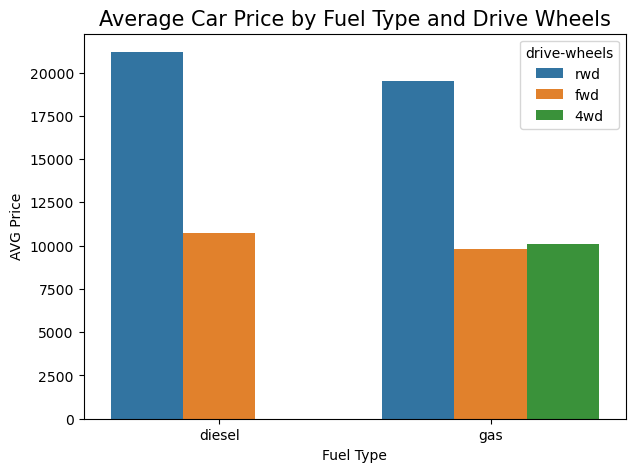

In [32]:
fuel_drive_price = df.groupby(['fuel-type','drive-wheels'])['price'].mean().reset_index().sort_values(by='price',ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x='fuel-type',y='price',data=fuel_drive_price,hue='drive-wheels')
plt.title('Average Car Price by Fuel Type and Drive Wheels',fontsize=15)
plt.xlabel('Fuel Type')
plt.ylabel('AVG Price')
plt.show()

Rear-wheel drive (RWD) cars tend to be more expensive, and most of them are available in both diesel and gas fuel types. On the other hand, four-wheel drive (4WD) cars are only available with gas engines.

-------

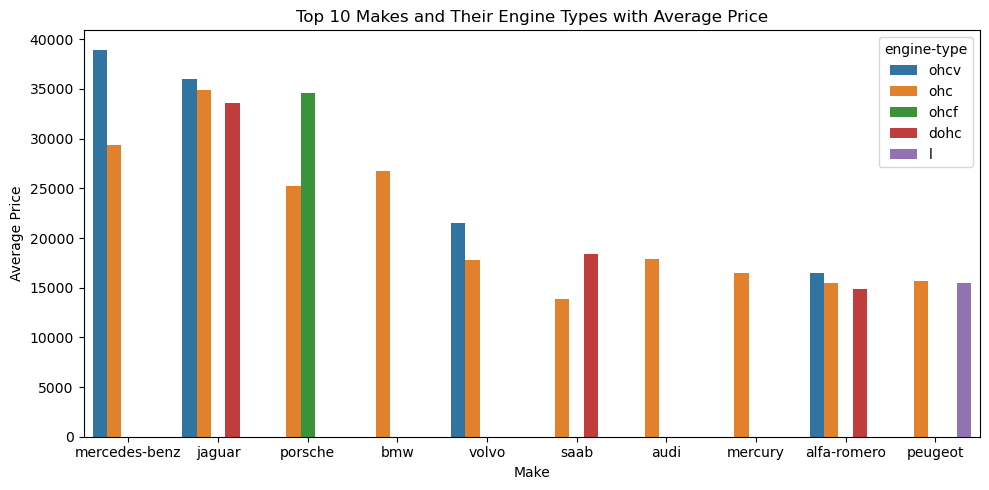

In [33]:
make_engine_avgprice = df.groupby(['make', 'engine-type'])['price'].mean().sort_values(ascending=False).reset_index()
top_10_makes = make_engine_avgprice.groupby('make')['price'].mean().sort_values(ascending=False).head(10).index
top_10_make_engine_avgprice = make_engine_avgprice[make_engine_avgprice['make'].isin(top_10_makes)]

plt.figure(figsize=(10, 5))
sns.barplot(x='make', y='price', data=top_10_make_engine_avgprice, hue='engine-type')
plt.title('Top 10 Makes and Their Engine Types with Average Price')
plt.xlabel('Make')
plt.ylabel('Average Price') 
plt.tight_layout()
plt.show()

- `Mercedes-Benz` and `Volvo` are equipped with `OHC and OHCV` engine configurations. Among these, Mercedes-Benz exhibits the highest average price, indicating a premium positioning across both engine types.
- `Jaguar and Alfa Romeo` offer a diverse range of engine architectures, including `OHC, OHCV, and DOHC`. Notably, Jaguar demonstrates the highest pricing across these configurations, reflecting its focus on high-performance and luxury segments.
- `Porsche` models are available with `OHC and OHCF` engine types. Within the OHCF category, Porsche leads with the most expensive offerings, underscoring its engineering exclusivity and brand prestige.
- `BMW, Mercury, and Audi` all utilize the `OHC engine type`. BMW stands out with the highest pricing among this group, consistent with its reputation for delivering performance-oriented vehicles with advanced engineering.
- `Peugeot` employs both `OHC and inline engine types`. Across both configurations, Peugeot leads in price within its engine categories, suggesting a relatively higher valuation for its engineering choices in the compact and mid-size car segments.

----------

In [ ]:
df_subset = df[['length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm' ,'price']]
df_subset['price_category'] = pd.qcut(df_subset['price'], q=3, labels=['Low', 'Medium', 'High'])

sns.pairplot(df_subset, hue='price_category', palette='viridis')
plt.suptitle('Pairplot: Features vs. Price Category', y=1.02)
plt.show()

-----------

### Correlation Matrix

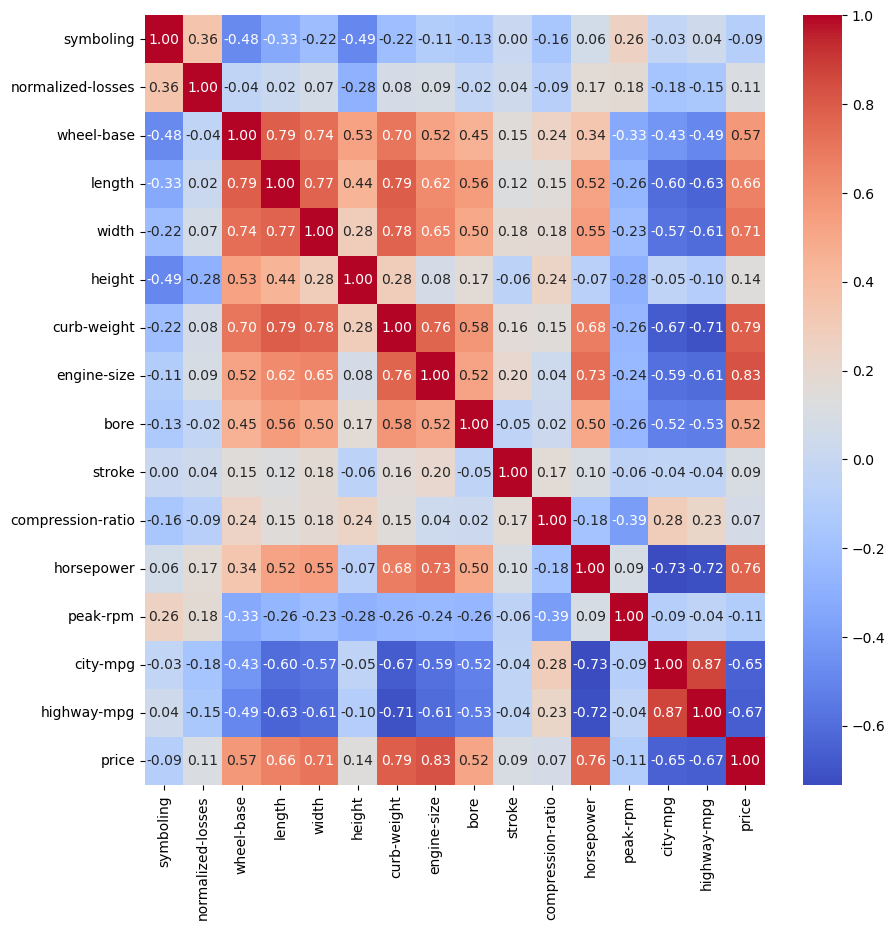

In [35]:
num = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [36]:
correlation_with_target = df[numerical_features].corr()['price'].sort_values(ascending=False)

print("Top positively correlated:\n", correlation_with_target)
print("\nTop negatively correlated:\n", correlation_with_target)

Top positively correlated:
 price                1.000000
engine-size          0.827361
curb-weight          0.789834
horsepower           0.763740
width                0.709816
length               0.663409
wheel-base           0.566932
bore                 0.517864
height               0.139918
normalized-losses    0.109223
stroke               0.092514
compression-ratio    0.073594
symboling           -0.092012
peak-rpm            -0.108704
city-mpg            -0.650491
highway-mpg         -0.665871
Name: price, dtype: float64

Top negatively correlated:
 price                1.000000
engine-size          0.827361
curb-weight          0.789834
horsepower           0.763740
width                0.709816
length               0.663409
wheel-base           0.566932
bore                 0.517864
height               0.139918
normalized-losses    0.109223
stroke               0.092514
compression-ratio    0.073594
symboling           -0.092012
peak-rpm            -0.108704
city-mpg       

- **`Target column: Price`, engine-size, curb-weight, horsepower, width, length, wheel-base, bore, highway-mpg, city-mpg these are the highly correlated feature**
- **Engine size, curb-weight, horsepower, width highly correlated with target column so we keep them**  

In [37]:
features_df = df[numerical_features].drop(columns=['price'])
corr_matrix = features_df.corr()

threshold = 0.7

high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().reset_index())
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[abs(high_corr['Correlation']) > threshold]

print("Highly correlated input features:\n", high_corr.sort_values(by='Correlation', ascending=False))

Highly correlated input features:
        Feature 1    Feature 2  Correlation
104     city-mpg  highway-mpg     0.866629
41        length  curb-weight     0.792465
27    wheel-base       length     0.788264
51         width  curb-weight     0.775055
39        length        width     0.773800
69   curb-weight  engine-size     0.764232
28    wheel-base        width     0.735519
80   engine-size   horsepower     0.733774
30    wheel-base  curb-weight     0.704463
76   curb-weight  highway-mpg    -0.711205
101   horsepower  highway-mpg    -0.718016
100   horsepower     city-mpg    -0.734102


  - **Engine size, curb-weight, horsepower, highly correlated with target column**  
  - **Remove length, wheel-base, width, city-mpg**

--------

## Linear Regression

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

**I have to apply the following ML techniques:**
- To evaluate different machine learning algorithms on the dataset, I implemented and applied pipelines for three regression models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Each model was encapsulated in a separate Pipeline, which included both preprocessing steps and the respective regressor. These pipelines were then fitted and evaluated using the same training and testing sets to ensure a fair comparison of model performance.

**Linear Regression Pipeline**

- I make a pipeline for linear regression 
- Encode categorical variables, for the model
- One hot encode for nominal cat features, and Ordinal encode for ordinal cat features

In [40]:
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

lr_trans_1 = ColumnTransformer([
    
    ('ohe', OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
     ['make','engine-location','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),
    ('ord_enco', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

**Find the less correlated features with the target variable and remove them**

In [41]:
features_df = df.drop(columns=['price'])

X_transformed = lr_trans_1.fit_transform(features_df)
X_transformed_df = pd.DataFrame(X_transformed, columns=lr_trans_1.get_feature_names_out())

corr_matrix = X_transformed_df.corr()
threshold = 0.7

high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().reset_index())
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[abs(high_corr['Correlation']) > threshold]

print("Highly correlated input features:\n", high_corr.sort_values(by='Correlation', ascending=False))

Highly correlated input features:
                        Feature 1                     Feature 2  Correlation
1496        ohe__fuel-system_idi  remainder__compression-ratio     0.879595
1710         remainder__city-mpg        remainder__highway-mpg     0.866629
647            ohe__make_peugeot            ohe__engine-type_l     0.851185
864             ohe__make_subaru         ohe__engine-type_ohcf     0.801845
1647           remainder__length        remainder__curb-weight     0.792465
1633       remainder__wheel-base             remainder__length     0.788264
1657            remainder__width        remainder__curb-weight     0.775055
1412      ohe__engine-type_rotor         ohe__fuel-system_4bbl     0.774690
1645           remainder__length              remainder__width     0.773800
1675      remainder__curb-weight        remainder__engine-size     0.764232
1583  ord_enco__num-of-cylinders        remainder__engine-size     0.746622
727            ohe__make_porsche     ohe__engine-loca

In [42]:
X1 = df.drop(['symboling', 'normalized-losses','bore', 'stroke','height', 'compression-ratio', 'symboling', 'peak-rpm', 'highway-mpg', 'price'],  axis=1)
y1 = df['price']

In [43]:
lr_pipeline_1 = Pipeline([('preprocessor', lr_trans_1),
                          ('regressor', LinearRegression())])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
lr_pipeline_1.fit(X_train1, y_train1)

y_train_pred1 = lr_pipeline_1.predict(X_train1)
y_test_pred1 = lr_pipeline_1.predict(X_test1)

**Evaluation Metrics**

In [111]:
# MSE
train_mse1 = mean_squared_error(y_train1, y_train_pred1)
test_mse1 = mean_squared_error(y_test1, y_test_pred1)
# MAE
train_mae1 = mean_absolute_error(y_train1, y_train_pred1)
test_mae1 = mean_absolute_error(y_test1, y_test_pred1)
# RMSE
train_rmse1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
test_rmse1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
# R² Score
train_r21 = r2_score(y_train1, y_train_pred1)
test_r21 = r2_score(y_test1, y_test_pred1)
# Adjusted R²
def adjusted_r21(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))
n_train1, k1 = X_train1.shape
n_test1 = X_test1.shape[0]
train_adj_r21 = adjusted_r21(train_r21, n_train1, k1)
test_adj_r21 = adjusted_r21(test_r21, n_test1, k1)

print('Linear Regression Model')
print(f"\nTrain MSE: {train_mse1:.4f}")
print(f"Test MSE: {test_mse1:.4f}")
print('==============================')
print(f"\nTrain MAE: {train_mae1:.4f}")
print(f"Test MAE: {test_mae1:.4f}")
print('==============================')
print(f"\nTrain RMSE: {train_rmse1:.4f}")
print(f"Test RMSE: {test_rmse1:.4f}")
print('==============================')
print(f"\nTrain R²: {train_r21:.4f}")
print(f"Test R²: {test_r21:.4f}")
print('==============================')
print(f"\nTrain Adjusted R²: {train_adj_r21:.4f}")
print(f"Test Adjusted R²: {test_adj_r21:.4f}")

Linear Regression Model

Train MSE: 5162039.7729
Test MSE: 5254884.5825

Train MAE: 1537.4394
Test MAE: 1565.8101

Train RMSE: 2272.0123
Test RMSE: 2292.3535

Train R²: 0.9188
Test R²: 0.9154

Train Adjusted R²: 0.9187
Test Adjusted R²: 0.9152


- **Compared to the model with all features, we achieved similar performance using fewer features, while still maintaining a good fit without signs of overfitting**

**Visualization of residuals to evaluate model performance for both feature sets**

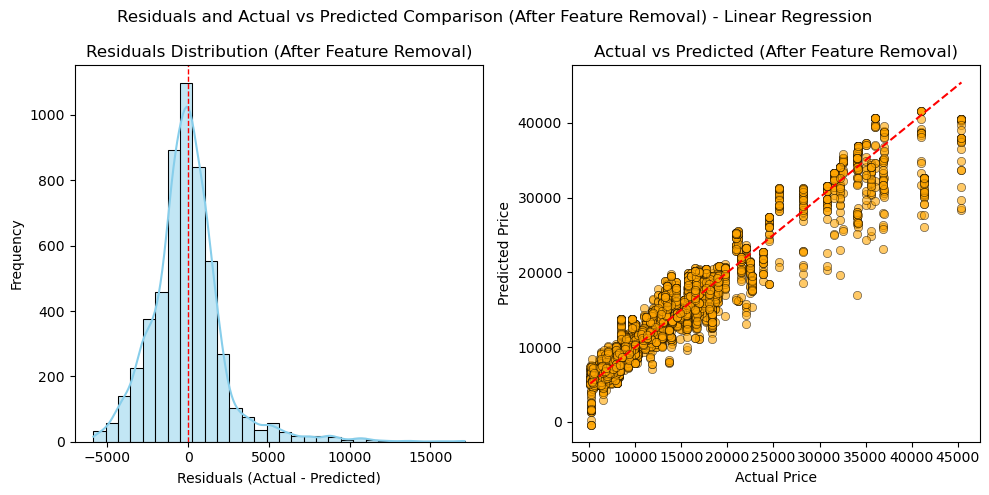

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

residuals1 = y_test1 - y_test_pred1
sns.histplot(residuals1, bins=30, kde=True, color="skyblue", edgecolor="black", ax=ax[0])
ax[0].axvline(x=0, color='red', linestyle='--', linewidth=1)
ax[0].set_title("Residuals Distribution (After Feature Removal)")
ax[0].set_xlabel("Residuals (Actual - Predicted)")
ax[0].set_ylabel("Frequency")

sns.scatterplot(x=y_test1, y=y_test_pred1, alpha=0.6, color='orange', edgecolor='k', ax=ax[1])
ax[1].plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color='red', linestyle='--')
ax[1].set_title("Actual vs Predicted (After Feature Removal)")
ax[1].set_xlabel("Actual Price")
ax[1].set_ylabel("Predicted Price")

plt.suptitle("Residuals and Actual vs Predicted Comparison (After Feature Removal) - Linear Regression")
plt.tight_layout()
plt.show()

------------

## Decision Tree Regression

In [90]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

**Pipeline for Decision Tree Regression**

In [62]:
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

dtr1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['make', 'engine-location', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),
    ('ord_enco', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,
                                categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

In [63]:
dtrx_1 = df.drop(['symboling', 'normalized-losses', 'bore', 'stroke', 'height',
                  'compression-ratio', 'peak-rpm', 'highway-mpg', 'price'], axis=1)
dtry_1 = df['price']

**Best Hyperparameters Found by GridSearchCV**
- {'regressor__ccp_alpha': 0.0001, 'regressor__max_depth': 40, 'regressor__max_features': 25, 'regressor__max_leaf_nodes': 100, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__splitter': 'random'

In [64]:
dtr1_pipeline = Pipeline([
    ('preprocessor', dtr1),
    ('regressor', DecisionTreeRegressor(ccp_alpha=0.0001, max_depth=40, max_features=25, 
                                        max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=10,splitter='random' ,random_state=42))])

X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(dtrx_1, dtry_1, test_size=0.2, random_state=42)

dtr1_pipeline.fit(X_train_dtr, y_train_dtr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make', 'engine-location',
                                                   'fuel-type', 'aspiration',
                                                   'body-style', 'drive-wheels',
                                                   'engine-type',
                                                   'fuel-system']),
                                                 ('ord_enco',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'three',
                                                                              'four',
                                                                              'five',
                                                                              'six',
                                                                              'eight',
                                                                              'twelve'],
                                                                             ['two',
                                                                              'four']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['num-of-cylinders',
                                                   'num-of-doors'])])),
                ('regressor',
                 DecisionTreeRegressor(ccp_alpha=0.0001, max_depth=40,
                                       max_features=25, max_leaf_nodes=100,
                                       min_samples_leaf=2, min_samples_split=10,
                                       random_state=42, splitter='random'))])

**Evaluation Metrics for DTR**

In [112]:
y_train_pred_dtr = dtr1_pipeline.predict(X_train_dtr)
y_test_pred_dtr = dtr1_pipeline.predict(X_test_dtr)

# MSE
train_mse_dtr = mean_squared_error(y_train_dtr, y_train_pred_dtr)
test_mse_dtr = mean_squared_error(y_test_dtr, y_test_pred_dtr)
# MAE
train_mae_dtr = mean_absolute_error(y_train_dtr, y_train_pred_dtr)
test_mae_dtr = mean_absolute_error(y_test_dtr, y_test_pred_dtr)
# RMSE
train_rmse_dtr = np.sqrt(mean_squared_error(y_train_dtr, y_train_pred_dtr))
test_rmse_dtr = np.sqrt(mean_squared_error(y_test_dtr, y_test_pred_dtr))
# R² 
train_r2_dtr = r2_score(y_train_dtr, y_train_pred_dtr)
test_r2_dtr = r2_score(y_test_dtr, y_test_pred_dtr)
# Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))
n_train_dtr, k_dtr = X_train_dtr.shape
n_test_dtr = X_test_dtr.shape[0]
train_adj_r2_dtr = adjusted_r2(train_r2_dtr, n_train_dtr, k_dtr)
test_adj_r2_dtr = adjusted_r2(test_r2_dtr, n_test_dtr, k_dtr)

print('Decision Tree Regressor')
print(f"\nTrain MSE: {train_mse_dtr:.4f}")
print(f"Test MSE: {test_mse_dtr:.4f}")
print('==============================')
print(f"\nTrain MAE: {train_mae_dtr:.4f}")
print(f"Test MAE: {test_mae_dtr:.4f}")
print('==============================')
print(f"\nTrain RMSE: {train_rmse_dtr:.4f}")
print(f"Test RMSE: {test_rmse_dtr:.4f}")
print('==============================')
print(f"\nTrain R²: {train_r2_dtr:.4f}")
print(f"Test R²: {test_r2_dtr:.4f}")
print('==============================')
print(f"\nTrain Adjusted R²: {train_adj_r2_dtr:.4f}")
print(f"Test Adjusted R²: {test_adj_r2_dtr:.4f}")

Decision Tree Regressor

Train MSE: 1715425.7840
Test MSE: 1776206.9677

Train MAE: 853.7516
Test MAE: 857.2577

Train RMSE: 1309.7426
Test RMSE: 1332.7441

Train R²: 0.9730
Test R²: 0.9714

Train Adjusted R²: 0.9730
Test Adjusted R²: 0.9713


- After removing less important features, the Decision Tree Regressor showed balanced performance with minimal overfitting. 
- Both Train and Test R² remained high (0.97), and error metrics like MAE and RMSE were nearly identical, indicating strong generalization

In [93]:
preprocessor = dtr1_pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

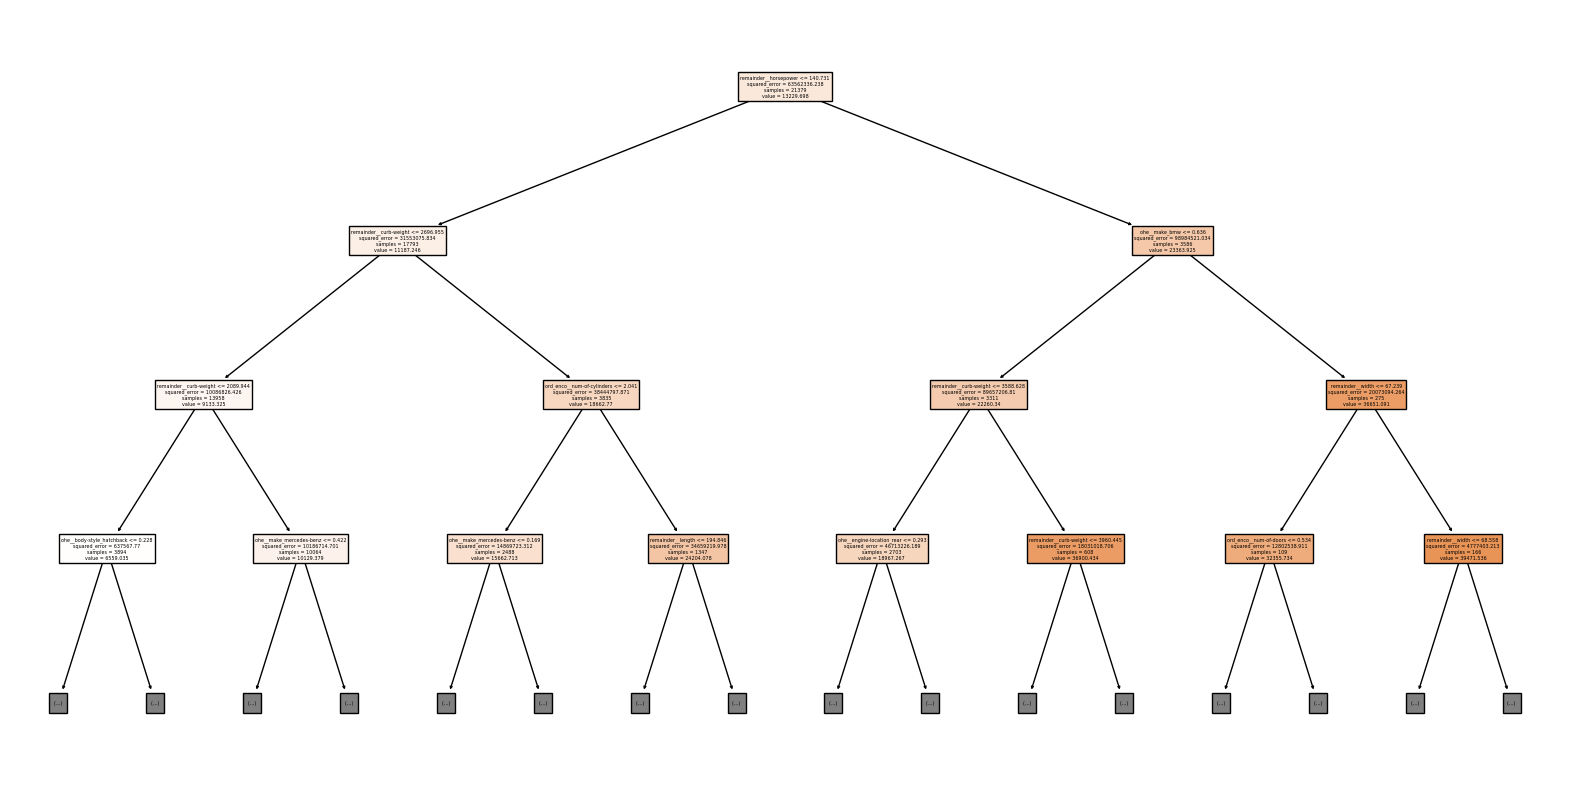

In [94]:
tree_model = dtr1_pipeline.named_steps['regressor']
feature_names = dtr1_pipeline.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=feature_names, max_depth=3)
plt.show()

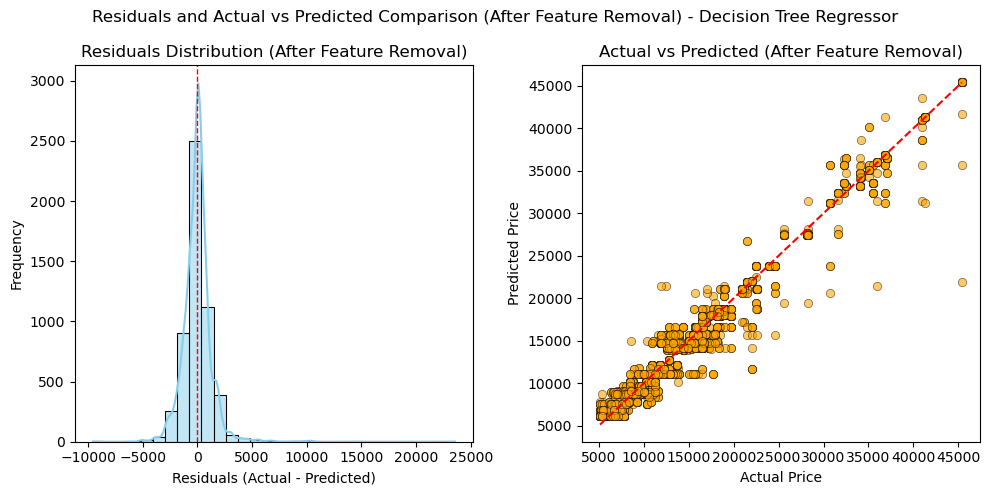

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

residualsdtr = y_test_dtr - y_test_pred_dtr
sns.histplot(residualsdtr, bins=30, kde=True, color="skyblue", edgecolor="black", ax=ax[0])
ax[0].axvline(x=0, color='red', linestyle='--', linewidth=1)
ax[0].set_title("Residuals Distribution (After Feature Removal)")
ax[0].set_xlabel("Residuals (Actual - Predicted)")
ax[0].set_ylabel("Frequency")

sns.scatterplot(x=y_test_dtr, y=y_test_pred_dtr, alpha=0.6, color='orange', edgecolor='k', ax=ax[1])
ax[1].plot([y_test_dtr.min(), y_test_dtr.max()], [y_test_dtr.min(), y_test_dtr.max()], color='red', linestyle='--')
ax[1].set_title("Actual vs Predicted (After Feature Removal)")
ax[1].set_xlabel("Actual Price")
ax[1].set_ylabel("Predicted Price")

plt.suptitle("Residuals and Actual vs Predicted Comparison (After Feature Removal) - Decision Tree Regressor")
plt.tight_layout()
plt.show()

------------

## Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [84]:
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

rf_transformer1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['make', 'engine-location', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,
                           categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

**Best Parameters for Random Forest Regressor**
- Best Parameters: {'regressor__bootstrap': True, 'regressor__max_depth': 40, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}

In [98]:
rf_X1 = df.drop(['symboling', 'normalized-losses', 'bore', 'stroke', 'height',
                  'compression-ratio', 'peak-rpm', 'highway-mpg', 'price'], axis=1)
rf_y1 = df['price']

rf_pipeline1 = Pipeline([
    ('preprocessor', rf_transformer1),
    ('regressor', RandomForestRegressor(bootstrap=True,max_depth=40, min_samples_leaf=2, 
                                        min_samples_split=2 , n_estimators=100 ,random_state=42))])

X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(rf_X1, rf_y1, test_size=0.2, random_state=42)
rf_pipeline1.fit(X_train_rf1, y_train_rf1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make', 'engine-location',
                                                   'fuel-type', 'aspiration',
                                                   'body-style', 'drive-wheels',
                                                   'engine-type',
                                                   'fuel-system']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'three',
                                                                              'four',
                                                                              'five',
                                                                              'six',
                                                                              'eight',
                                                                              'twelve'],
                                                                             ['two',
                                                                              'four']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['num-of-cylinders',
                                                   'num-of-doors'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=40, min_samples_leaf=2,
                                       random_state=42))])

In [99]:
y_train_pred_rf1 = rf_pipeline1.predict(X_train_rf1)
y_test_pred_rf1 = rf_pipeline1.predict(X_test_rf1)

# MSE
train_mse_rf1 = mean_squared_error(y_train_rf1, y_train_pred_rf1)
test_mse_rf1 = mean_squared_error(y_test_rf1, y_test_pred_rf1)
# MAE
train_mae_rf1 = mean_absolute_error(y_train_rf1, y_train_pred_rf1)
test_mae_rf1 = mean_absolute_error(y_test_rf1, y_test_pred_rf1)
# RMSE
train_rmse_rf1 = np.sqrt(mean_squared_error(y_train_rf1, y_train_pred_rf1))
test_rmse_rf1 = np.sqrt(mean_squared_error(y_test_rf1, y_test_pred_rf1))
# R²
train_r2_rf1 = r2_score(y_train_rf1, y_train_pred_rf1)
test_r2_rf1 = r2_score(y_test_rf1, y_test_pred_rf1)
# Adjusted R² function
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))
n_train_rf1, k_rf1 = X_train_rf1.shape
n_test_rf1 = X_test_rf1.shape[0]
train_adj_r2_rf1 = adjusted_r2(train_r2_rf1, n_train_rf1, k_rf1)
test_adj_r2_rf1 = adjusted_r2(test_r2_rf1, n_test_rf1, k_rf1)

print("Random Forest Model")
print(f"\nTrain MSE: {train_mse_rf1:.4f}")
print(f"Test MSE: {test_mse_rf1:.4f}")
print('==================================')
print(f"\nTrain MAE: {train_mae_rf1:.4f}")
print(f"Test MAE: {test_mae_rf1:.4f}")
print('==================================')
print(f"\nTrain RMSE: {train_rmse_rf1:.4f}")
print(f"Test RMSE: {test_rmse_rf1:.4f}")
print('==================================')
print(f"\nTrain R²: {train_r2_rf1:.4f}")
print(f"Test R²: {test_r2_rf1:.4f}")
print('==================================')
print(f"\nTrain Adjusted R²: {train_adj_r2_rf1:.4f}")
print(f"Test Adjusted R²: {test_adj_r2_rf1:.4f}")

Random Forest Model

Train MSE: 146727.3371
Test MSE: 315051.7191

Train MAE: 113.1672
Test MAE: 153.1049

Train RMSE: 383.0500
Test RMSE: 561.2947

Train R²: 0.9977
Test R²: 0.9949

Train Adjusted R²: 0.9977
Test Adjusted R²: 0.9949


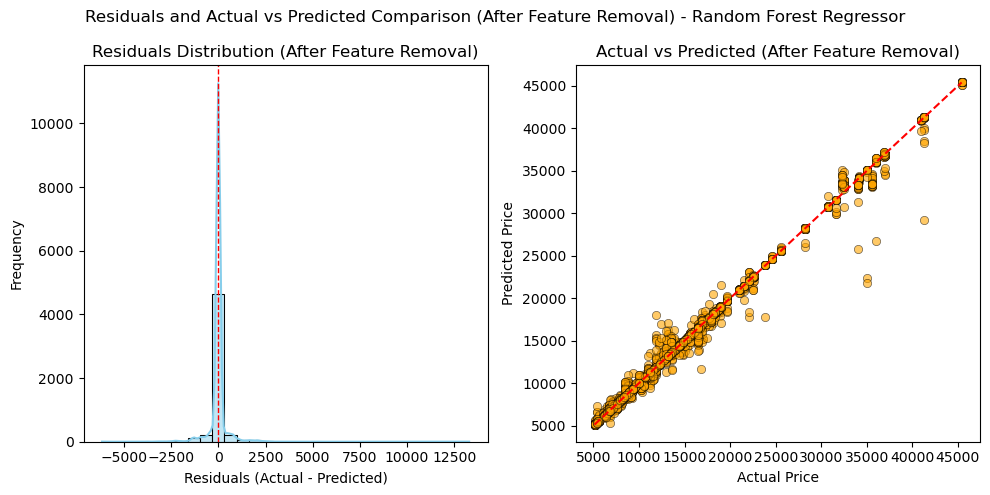

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

residualsrfr = y_test_rf1 - y_test_pred_rf1
sns.histplot(residualsrfr, bins=30, kde=True, color="skyblue", edgecolor="black", ax=ax[0])
ax[0].axvline(x=0, color='red', linestyle='--', linewidth=1)
ax[0].set_title("Residuals Distribution (After Feature Removal)")
ax[0].set_xlabel("Residuals (Actual - Predicted)")
ax[0].set_ylabel("Frequency")

sns.scatterplot(x=y_test_rf1, y=y_test_pred_rf1, alpha=0.6, color='orange', edgecolor='k', ax=ax[1])
ax[1].plot([y_test_rf1.min(), y_test_rf1.max()], [y_test_rf1.min(), y_test_rf1.max()], color='red', linestyle='--')
ax[1].set_title("Actual vs Predicted (After Feature Removal)")
ax[1].set_xlabel("Actual Price")
ax[1].set_ylabel("Predicted Price")

plt.suptitle("Residuals and Actual vs Predicted Comparison (After Feature Removal) - Random Forest Regressor")
plt.tight_layout()
plt.show()

**Comparison of MSE, R2 score for all three models**

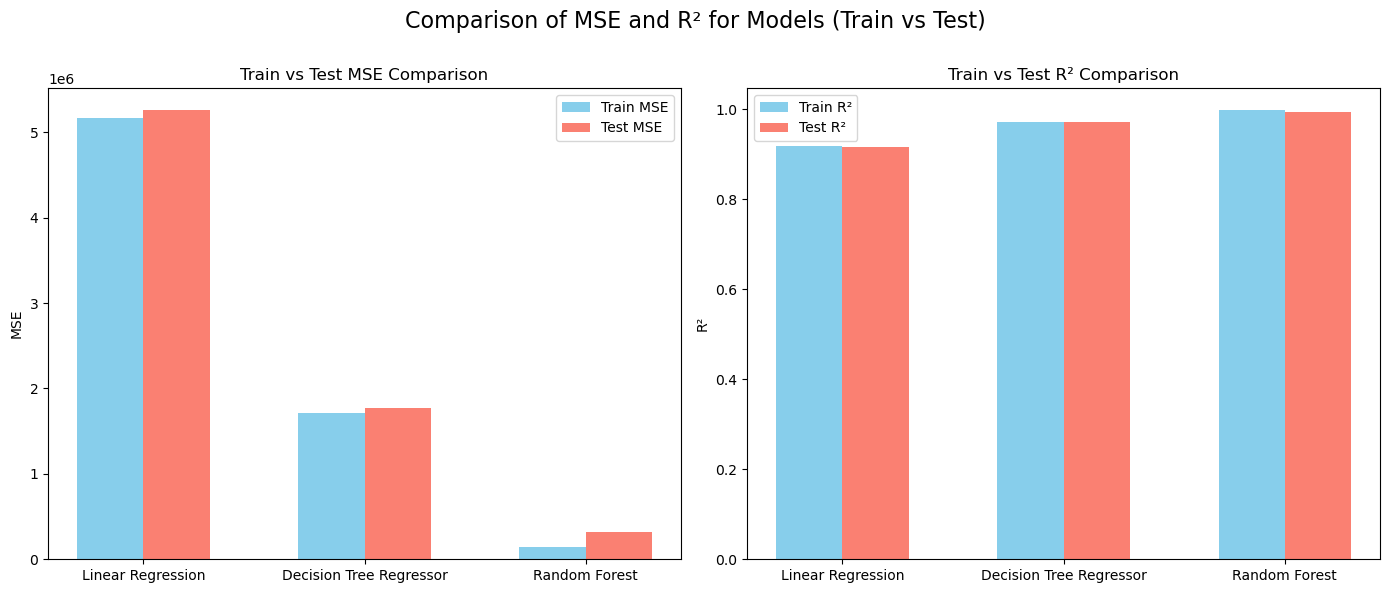

In [110]:
metrics_lr = {'MSE': [train_mse1, test_mse1], 'R²': [train_r21, test_r21]}
metrics_dtr = {'MSE': [train_mse_dtr, test_mse_dtr], 'R²': [train_r2_dtr, test_r2_dtr]}
metrics_rf = {'MSE': [train_mse_rf1, test_mse_rf1], 'R²': [train_r2_rf1, test_r2_rf1]}

models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest']
metrics_combined = {
    'Linear Regression': [train_mse1, test_mse1, train_r21, test_r21],
    'Decision Tree Regressor': [train_mse_dtr, test_mse_dtr, train_r2_dtr, test_r2_dtr],
    'Random Forest': [train_mse_rf1, test_mse_rf1, train_r2_rf1, test_r2_rf1]}

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

bar_width = 0.3
x_pos = np.arange(len(models))

ax[0].bar(x_pos - bar_width/2, [metrics_combined[model][0] for model in models], bar_width, label='Train MSE', color='skyblue')
ax[0].bar(x_pos + bar_width/2, [metrics_combined[model][1] for model in models], bar_width, label='Test MSE', color='salmon')
ax[0].set_title('Train vs Test MSE Comparison')
ax[0].set_ylabel('MSE')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(models)
ax[0].legend()

ax[1].bar(x_pos - bar_width/2, [metrics_combined[model][2] for model in models], bar_width, label='Train R²', color='skyblue')
ax[1].bar(x_pos + bar_width/2, [metrics_combined[model][3] for model in models], bar_width, label='Test R²', color='salmon')
ax[1].set_title('Train vs Test R² Comparison')
ax[1].set_ylabel('R²')
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(models)
ax[1].legend()

plt.suptitle('Comparison of MSE and R² for Models (Train vs Test)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  
plt.show()

**Model Comparison Summary**
- The Random Forest model stands out as the best performer, with the highest R² and adjusted R² values, indicating excellent predictive power. It also has the lowest MAE and RMSE on the training set, making it highly accurate.

- Decision Tree Regressor also performs exceptionally well, with high R² values and relatively low MSE and RMSE compared to Linear Regression.

- Linear Regression, while a strong model with decent results, falls short in comparison to the more complex models, showing higher MSE, MAE, and RMSE, and a slightly lower R².

**Recommendation**
- If computational efficiency and simplicity are key, Linear Regression could be used, but for better accuracy and predictive power, the Decision Tree Regressor or Random Forest models should be prioritized. Random Forest, in particular, should be considered the best option for this dataset based on its strong performance across all metrics.

-----------

## Reporting & Insights 

**What key insights did you gain from EDA about car prices**
- Car Brand Popularity: Toyota is the most popular car brand, making up about 24% of the dataset. This suggests Toyota has a strong market presence or is more widely available in the dataset.

- Car Type Distribution: Sedans represent the majority of cars in the dataset, accounting for 50%. This aligns with consumer preferences for vehicles offering comfort, fuel efficiency, and practicality.

- Engine Type Preference: The most common engine types in the dataset are the OHC (Overhead Camshaft) engine, found in 70% of the cars, and the 4-cylinder engine, which makes up 78% of the entries. These engine types offer a balance between performance and fuel efficiency, which could explain their popularity.

- Fuel System Trends: Around 50% of the cars use the MPFI (Multi-Point Fuel Injection) system, reflecting a modern trend towards improving fuel efficiency and reducing emissions.

- Drive Type: Front-wheel drive (FWD) is the most common configuration, present in 60% of the cars. This could reflect the cost-effectiveness and fuel efficiency of FWD vehicles.

- Engine Location: 95% of the cars have a front engine location, which is typical for most car models and configurations.

- Price Variations by Features:

- Luxury and high-performance cars, such as those from Jaguar, Mercedes-Benz, Porsche, and BMW, tend to have significantly higher prices.

- Diesel cars and those with turbocharged engines also tend to have higher prices, likely due to the more advanced engine technology and higher performance.

- RWD (Rear-Wheel Drive) cars tend to be more expensive, as they are often associated with premium, sports, and luxury vehicles.

**Which features had the most impact on price prediction**
- Car Brand
- Engine Type
- Fuel System
- Drive Type
- Engine Configuration
- Body Style
- Horsepower
- MPG 

**What challenges did you face during preprocessing and modeling**
- The data had some anomilies like (wrong data type, wrong values, incorrect data format) etc, missing values, and outliers. 
- In modeling we had to deal with the categorical data, so we had to encode it, then find the highly correlated features with targest variable, the remove the highly correlated input features to input features, then some feature selection.
- To much time spent on model tunning.

**If given a larger dataset with more features, what additional steps would you take?**
- Feature Engineering: With more data, I would explore new features that might better capture the relationships.
- Model Optimization: With a larger dataset, I would experiment with more complex models like ensemble methods (Random Forest, Gradient Boosting).
- Address Multicollinearity: I would use techniques like Principal Component Analysis (PCA) or regularization (L1/L2 regularization) to handle multicollinearity.